# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

pandas 엑셀 불러오고 쓰는 데 쓰이는 모듈  

# data preparation and visualization

In [2]:
pd.read_csv('regression.csv')

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


regression 

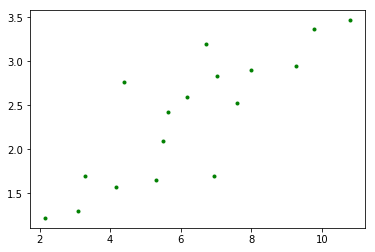

In [3]:
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']
plt.plot(X, Y, 'g.')

우리가 쓸 모델이 뭔지 정해놓고 시작해야 함  
우리는 y = ax + b의 모델을 쓸 거고 그러면 각각 x와 y로 그 데이터를 받아와야 함  
그게 위 cell임

plt module 불러왔기에 plot 할 수 있는데  
항상 plottable하지는 않은데 이 때는 x와 y 일대일 대응 되니 plottable함

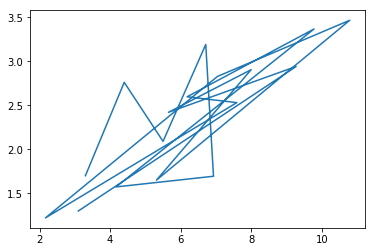

In [4]:
plt.plot(X, Y)

이런 건 wave에서 좀 유용할 것임

어쨌든 이제 우리가 구해야 할 건 가장 오차가 적게 나는 직선  
이건 2차원이라 존나 간단한데  
3차원만 되어도 달라짐
그래도 3차원은 그려질 수 있긴 함. x1, x2, y1  
평면이 그려질 것임.  
  
2차원 상의 데이터를 설명해주는 것은 1차원  
3차원 상의 데이터를 설명해주는 것은 2차원

# create model

2nd sequential이라는 model 은 일방향  
출력은 동그라미 하나고 input shape는 1이지만 실제로는 node 두 개임.  
rmsprop 을 sgd 대신 써라  
hidden layer를 넣는 방법.  
model.add 여러 개 하면 hidden layer 넣는 것임.
그리고 제일 마지막에 data는 1이 되어야 하니까 Dense(1) 되어야 함.  
  
마지막 activation = 'sigmoid'를 넣을 수 있음 / relu  / linear / tanh  등 여러 개 있음. linear는 그냥 적으나마나임.

식을 세우고 그림을 만든다 자체가 model임

Sequential() 은 그냥 모델 시작이라는 말임  
그래서 그걸 model 껍데기로 씌우고  
그리고 그 모델은 model.add로 정의해줌  
그 모델의 이름이 Dense인데,  
입력이 몇 개 인가, 출력이 몇 개인가를 결정하는 것임  
만약 x가 2 개이다, 그러면 input_shape에다가 2 적으면 되는 것  
  
Dense라는 말은 뭘까, 왜 하필 Dense?  
model 그림을 볼 때, 왼쪽 동그라미랑 오른쪽 동그라미랑 full connection이 되어있으면,  
그게 dense임.  
  
compile은 model의 마무리를 해주는 것임.  
우리는 a와 b를 구해야 하는데, 처음에는 a와 b를 랜덤하게 넣고
x 데이터를 한 개 넣으면, y가 나옴  
따라서 처음에는 output과 target이 차이가 날 수밖에 없음
그 차이를 수정할 때, 미분 방식을 쓰는데, 그 알고리즘을 optimizer = sgd로 loss는 그 차이를 

In [5]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.add(Dense(3))
model.add(Dense(6))
model.add(Dense(4))
model.add(Dense(1), activation = 'sigmoid')
model.compile(optimizer="sgd", loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Dense 부분은 출력차원 input shape는 입력 차원.
위에까지 y = ax+b의 차원을 만든 것임.

# train model

In [8]:
model.fit(X, Y, epochs = 100)

Epoch 1/100
17/17 [==============================] - 0s 25ms/sample - loss: 2.3860
Epoch 2/100
17/17 [==============================] - 0s 118us/sample - loss: 0.1995
Epoch 3/100
17/17 [==============================] - 0s 235us/sample - loss: 0.1789
Epoch 4/100
17/17 [==============================] - 0s 294us/sample - loss: 0.1786
Epoch 5/100
17/17 [==============================] - 0s 353us/sample - loss: 0.1785
Epoch 6/100
17/17 [==============================] - 0s 118us/sample - loss: 0.1784
Epoch 7/100
17/17 [==============================] - 0s 118us/sample - loss: 0.1783
Epoch 8/100
17/17 [==============================] - 0s 588us/sample - loss: 0.1781
Epoch 9/100
17/17 [==============================] - 0s 235us/sample - loss: 0.1780
Epoch 10/100
17/17 [==============================] - 0s 411us/sample - loss: 0.1779
Epoch 11/100
17/17 [==============================] - 0s 294us/sample - loss: 0.1778
Epoch 12/100
17/17 [==============================] - 0s 588us/sample - los

Epoch 100/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1694


data를 통해서 계산되어 나옴  
17/17 은 17개의 데이터를 가지고 훈련을 시켰다라는 뜻?

loss가 점점 더 작아지는 방식으로 가야지 훈련이 잘 되는 것임. 처음 epoch는 결국 loss값이 존나 클 수밖에 없음

# model prediction

[[0.74696565]
 [1.0484352 ]
 [1.3499048 ]
 [1.6513743 ]
 [1.9528439 ]
 [2.2543135 ]
 [2.555783  ]
 [2.8572526 ]
 [3.1587222 ]
 [3.4601917 ]]


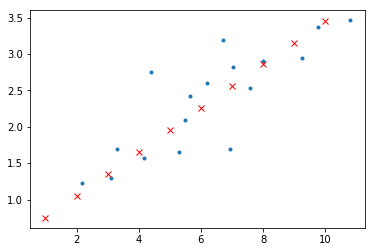

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = model.predict(x)
print(y)
plt.plot(X, Y, '.')
plt.plot(x, y, 'rx')

모델을 훈련시켰으니 예측하는 방법을 쓸 수 있음  
predict를 한다는 말은 어떤 시스템을 만들고 출력이 뭐가 나오는지 모를 상태에서 입력을 넣어보는 것임  
우리가 모델을 만들었기 때문에 y를 모델을 사용해서 predict함수에 x를 넣으면 됨  
그럴 때 y가 뭐가 나오는지 알 수 있음

그리고 그것이 제대로 나오는 건지 예측할 수 있음.  
하나는 원래 data  
하나는 새로운 data  
그리고 그걸 한 번에 비교할 수 있음.  
파란색은 원래 data  
prediction 하는 부분을 잘 보면 일직선임. 우리가 애초에 모델을 상정하기에 y = ax+b라는 직선이었기 떄문에 그럴 수밖에 없음

이제는 data가 없다 치더라도 이 model 만 들고 다니면 됨

# what are a and b in y = ax + b?

결국 우리가 필요한 걸 generalize 하면 a와 b임

In [11]:
weight = model.layers[0].get_weights()
print(weight)

[array([[0.30146956]], dtype=float32), array([0.44549605], dtype=float32)]


우리는 deep learning의 intermediate layer를 만들지 않았기 때문에 첫 번쨰 layer만 불러내면 됨.  
그리고 거기서 훈련이 벌써 됐으니까 weight를 가져오라 라고 하면 됨.